In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
h = 1.0
g = 9.8
v0 = 1.0
t1 = np.sqrt(2*h/g)
t = np.arange(0, t1, t1/100)
x = v0*t
y = h-g/2*t**2
print(t1)

0.451753951453


Text(0,0.5,'y')

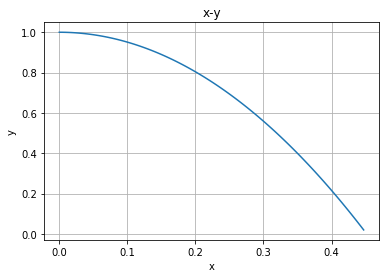

In [4]:
plt.plot(x, y)
plt.grid(True)
plt.title('x-y')
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

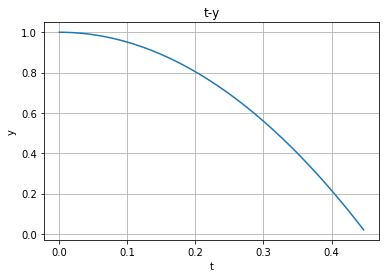

In [5]:
plt.plot(t, y)
plt.grid(True)
plt.title('t-y')
plt.xlabel('t')
plt.ylabel('y')

In [6]:
def f(deg):
    h = 1.0
    theta = np.radians(deg)
    vx0 = v0*np.cos(theta)
    vy0 = v0*np.sin(theta)
    t1 = (vy0+np.sqrt(vy0**2+2*g*h))/g
    n = 50
    t = np.arange(0, t1*(1+1/n), t1/n)
    x = vx0*t
    y = h+vy0*t-g/2*t**2
    xmax = 0.5
    ymax = 1.06
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x, y)
    
interactive(f, deg=(0, 90, 5))

A Jupyter Widget

In [23]:
def hight(h,v0):
    #v0 = 1.0
    d = np.arange(0, 90, 1)
    th = np.radians(d)
    vx0 = v0*np.cos(th)
    vy0 = v0*np.sin(th)
    t1 = (vy0+np.sqrt(vy0**2+2*g*h))/g
    x = vx0*t1
    t0 = vy0/g
    ymax = h+vy0**2/2/g
    plt.ylim(0, 2) 
    plt.plot(d, x)
    plt.xlabel(r"$\theta$[degree]")
    plt.ylabel("distance")
interactive(hight, h=(0,10), v0=(0.1, 3))

A Jupyter Widget

In [26]:
d = np.arange(0, 90, 1)
ymax = h + vy0**2/2/g
plt.plot(d, ymax)

NameError: name 'vy0' is not defined

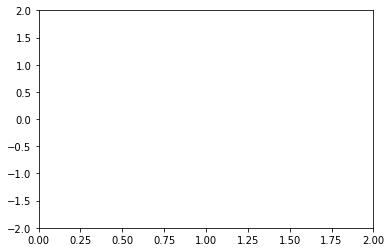

In [27]:
import matplotlib.animation as animation
fig = plt.figure()
ax = plt.axes(xlim=(0,2), ylim=(-2,2))
line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2*np.pi*(x-0.01*i))
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
plt.show()
#def plot(data):
#    plt.cla()
#    rand = np.random.randn(100)
#    im = plt.plot(rand)
#ani = animation.FuncAnimation(fig, plot, interval=100, frames=10)

In [32]:
from matplotlib.patches import Polygon
def func(x):
    return x**2
    #return np.sin(x)
    #return np.exp(-x)
a, b = 0, np.pi
a, b = 0, 1

def plotpoly(n):
    
    x = np.linspace(a, b)
    y = func(x)
    fig, ax = plt.subplots()
    plt.plot(x, y, 'r', linewidth=2)
    plt.ylim(ymin=0)
    ix = np.linspace(a, b, n)
    iy = func(ix)
    h = (b-a)/n
    for i in range(n):
        x0 = a + i * h
        x1 = a + (i+1)*h
        y0 = func(x0)
        y1 = func(x1)
        verts1 = [(x0,0), (x0,y0), (x1,y0), (x1,0)]
        verts2 = [(x0,0), (x0,y1), (x1,y1), (x1,0)]
        verts3 = [(x0,0), (x0,y0), (x1,y1), (x1,0)]
        poly1 = Polygon(verts1, facecolor='0.7', edgecolor='0.2')
        poly2 = Polygon(verts2, facecolor='0.9', edgecolor='0.3')
        poly3 = Polygon(verts3, facecolor='0.7', edgecolor='0.3')
        ax.add_patch(poly2)
        ax.add_patch(poly1)
        #ax.add_patch(poly3)
interactive(plotpoly, n=(2,10))

A Jupyter Widget

In [29]:
poly = Polygon([(1,0),(1,func(1)),(2,func(1)),(2,0)])
ax.add_patch(poly)

In [30]:
plt.show()